#**Práctica Final**
#Álvaro Acebes y José Luis García-Manso







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
from sklearn.datasets import load_digits
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('once')
warnings.simplefilter('ignore', (DeprecationWarning))




In [ ]:
pd.options.display.max_rows = 5 

In [ ]:
Airbnb = pd.read_csv("/content/airbnb-listings-extract.csv", header=0, sep=';')

In [ ]:
airbnb = Airbnb
airbnb = airbnb.set_index(['ID'])

#airbnb = airbnb.set_index(['ID','Name'])
airbnb = airbnb.drop(['Name','Listing Url', 'Scrape ID','Last Scraped','Summary','Thumbnail Url','Medium Url',
               'Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Since','Host Location',
               'Host About','Host Thumbnail Url','Host Picture Url','Host Neighbourhood',
               'Neighbourhood','Neighbourhood Cleansed','State','Zipcode','Market','City','Country Code',
               'Country','Latitude','Longitude', 'Amenities','Calendar last Scraped','First Review','Last Review',
               'License','Jurisdiction Names','Geolocation','Host Verifications',
                      'Neighbourhood Group Cleansed','Space', 'Description', 'Neighborhood Overview', 'Notes','Transit',
                      'Access', 'Interaction','House Rules','Street','Smart Location','Features'], axis = 1)



No aplicaremos la transformación de descripción a las columnas "Summary" y "Space" porque contienen información similar pero mal estructurada. Esto significa que, para una primera variable llamada "Description", describe la casa de cierta manera, mientras que "Space" describe la misma casa de otra manera. En el caso de una segunda variable, "Description" la describe de manera diferente a la primera variable, pero "Space" describe la segunda variable de la misma manera que "Description" describió la primera variable. Debido a esta falta de claridad, no aplicaremos el algoritmo de transformación de descripción a estas columnas.
Las columnas "Host Acceptance Rate" y "Square Feet" no contienen información relevante, por lo tanto, las eliminamos.
Las columnas restantes son "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction" y "House Rules".


# Limpieza de datos


Creamos un dataframe nuevo para visualizar lo que queremos hacer y posteriormente ejecutarlo sobre el que queremos trabajar (airbnb)

Experiences Offered                   0
Host Response Time                 1899
Host Response Rate                 1899
Host Acceptance Rate              14741
Host Listings Count                   3
                                  ...  
Review Scores Location             3340
Review Scores Value                3341
Cancellation Policy                   0
Calculated host listings count        4
Reviews per Month                  3162
Length: 40, dtype: int64


<Axes: >

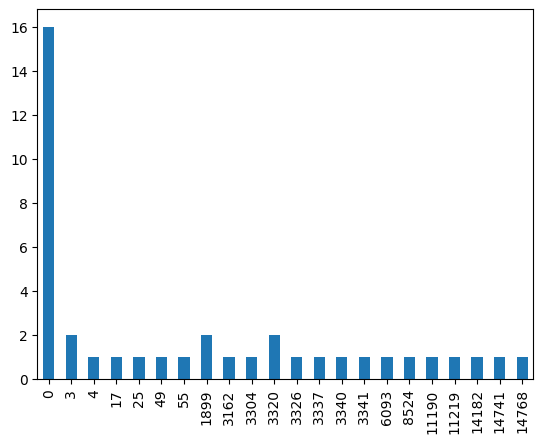

In [ ]:
pd.options.display.max_rows = 10
CountNA = airbnb.isna().sum()
print(CountNA)
CountNA.groupby(CountNA.values).count().plot.bar()

Podemos realizar una visualización gráfica de la distribución de los valores ausentes (NA) según la cantidad de ellos que exista en cada variable. Esto nos permite identificar que hay 16 variables que no tienen ningún valor NA, mientras que, por ejemplo, hay 2 variables que presentan 1899 valores NA entre sus registros. Esta visualización nos brinda una idea clara sobre la cantidad de valores faltantes que hay en cada variable, lo cual nos será útil para determinar cómo reemplazar cada uno de ellos.

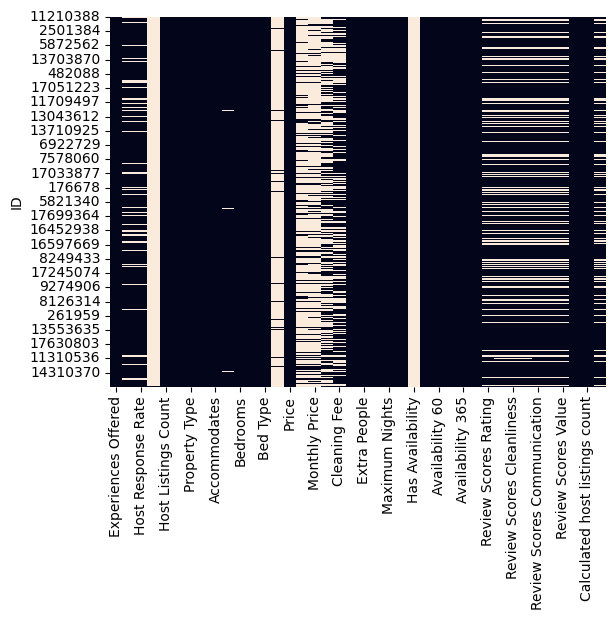

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
sns.heatmap(airbnb.isnull(), cbar=False)

100*airbnb['Square Feet'].isna().sum()/airbnb.shape[0]

for col in airbnb.columns: 
    if sum(airbnb[col].isnull())/float(len(airbnb.index)) > 0.60: del airbnb[col]
    

Con esta grafica observamos de manera visual en un plano 2D donde se hayan los NA.

Experiences Offered                0.000000
Host Response Time                12.848444
Host Response Rate                12.848444
Host Listings Count                0.020298
Host Total Listings Count          0.020298
Property Type                      0.000000
Room Type                          0.000000
Accommodates                       0.000000
Bathrooms                          0.372124
Bedrooms                           0.169147
Beds                               0.331529
Bed Type                           0.000000
Price                              0.115020
Security Deposit                  57.672530
Cleaning Fee                      41.224628
Guests Included                    0.000000
Extra People                       0.000000
Minimum Nights                     0.000000
Maximum Nights                     0.000000
Calendar Updated                   0.000000
Availability 30                    0.000000
Availability 60                    0.000000
Availability 90                 

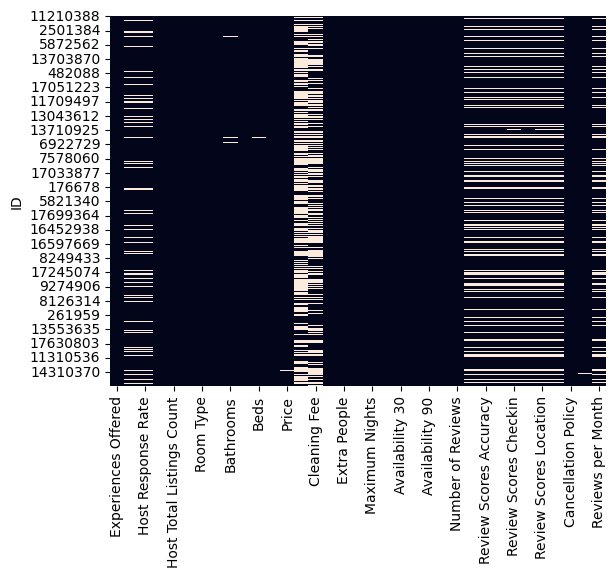

In [ ]:
sns.heatmap(airbnb.isnull(), cbar=False)

pd.options.display.max_rows = 50

100*airbnb.isna().sum()/airbnb.shape[0]


En esta tabla, hemos calculado la proporción de valores faltantes que existen para cada variable en relación al total de los datos. Se destacan dos variables, "Security Deposit" y "Cleaning Fee", con un 57% y 41% de valores faltantes respectivamente. Por otro lado, la mayoría de las demás variables están completas en gran medida.

Experiences Offered                object
Host Response Time                 object
Host Response Rate                float64
Host Listings Count               float64
Host Total Listings Count         float64
Property Type                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Bed Type                           object
Price                             float64
Security Deposit                  float64
Cleaning Fee                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Calendar Updated                   object
Availability 30                     int64
Availability 60                     int64
Availability 90                     int64
Availability 365                  

['Experiences Offered',
 'Host Response Time',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Calendar Updated',
 'Cancellation Policy']

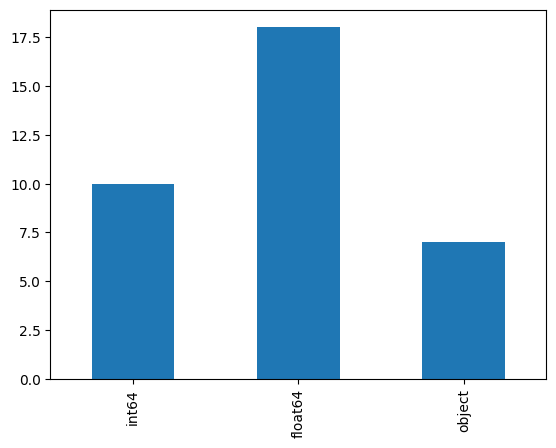

In [ ]:
data_types = airbnb.dtypes
print(data_types)
data_types.groupby(data_types.values).count().plot.bar()

cat_features = airbnb.dtypes[airbnb.dtypes == 'object'].index.to_list()
num_features = airbnb.dtypes[airbnb.dtypes != 'object'].index.to_list()

cat_features

Dividimos las variables entre enumericas y categoricas ya que mas adelante seran tratadas de diferente forma por su condición.

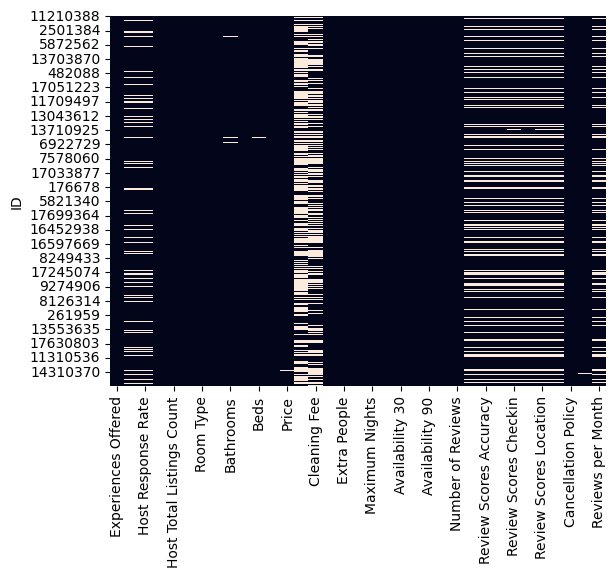

In [ ]:
sns.heatmap(airbnb.isnull(), cbar=False)

airbnb[cat_features].isna().sum()

airbnb[num_features] = airbnb[num_features].fillna(airbnb[num_features].mean())

airbnb[cat_features] = airbnb[cat_features].fillna(0)

Como hemos mencionado previamente, las variables son tratadas de manera diferente según su naturaleza. En el caso de variables numéricas que contengan valores faltantes, estos serán reemplazados por la media de la variable. Por otro lado, en el caso de variables categóricas, los valores faltantes serán sustituidos por ceros.



In [ ]:
from category_encoders.one_hot import OneHotEncoder
coder = OneHotEncoder()
coder.fit(airbnb[cat_features])
Dummies = pd.DataFrame(coder.transform(airbnb[cat_features]))
Dummies



<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Lo mencionado anteriormente cobra sentido al momento de crear variables ficticias (dummies) para las variables categóricas. Si sustituimos los valores faltantes por la media, los valores missing se convertirían en decimales, lo cual no es apropiado para variables categóricas, ya que después de su transformación en dummies, estas variables deben contener solo números enteros. Por lo tanto, es más adecuado sustituir los valores faltantes en variables categóricas con ceros o utilizar algún otro enfoque apropiado para datos categóricos.

In [ ]:
final=airbnb.join(Dummies)
Airbnb_ft = final.drop(cat_features, axis = 1)
Airbnb_ft.shape


Airbnb_ft.describe()

Correlation = Airbnb_ft.drop(['Price'], axis = 1)

sns.set(rc = {'figure.figsize':(20,20)})


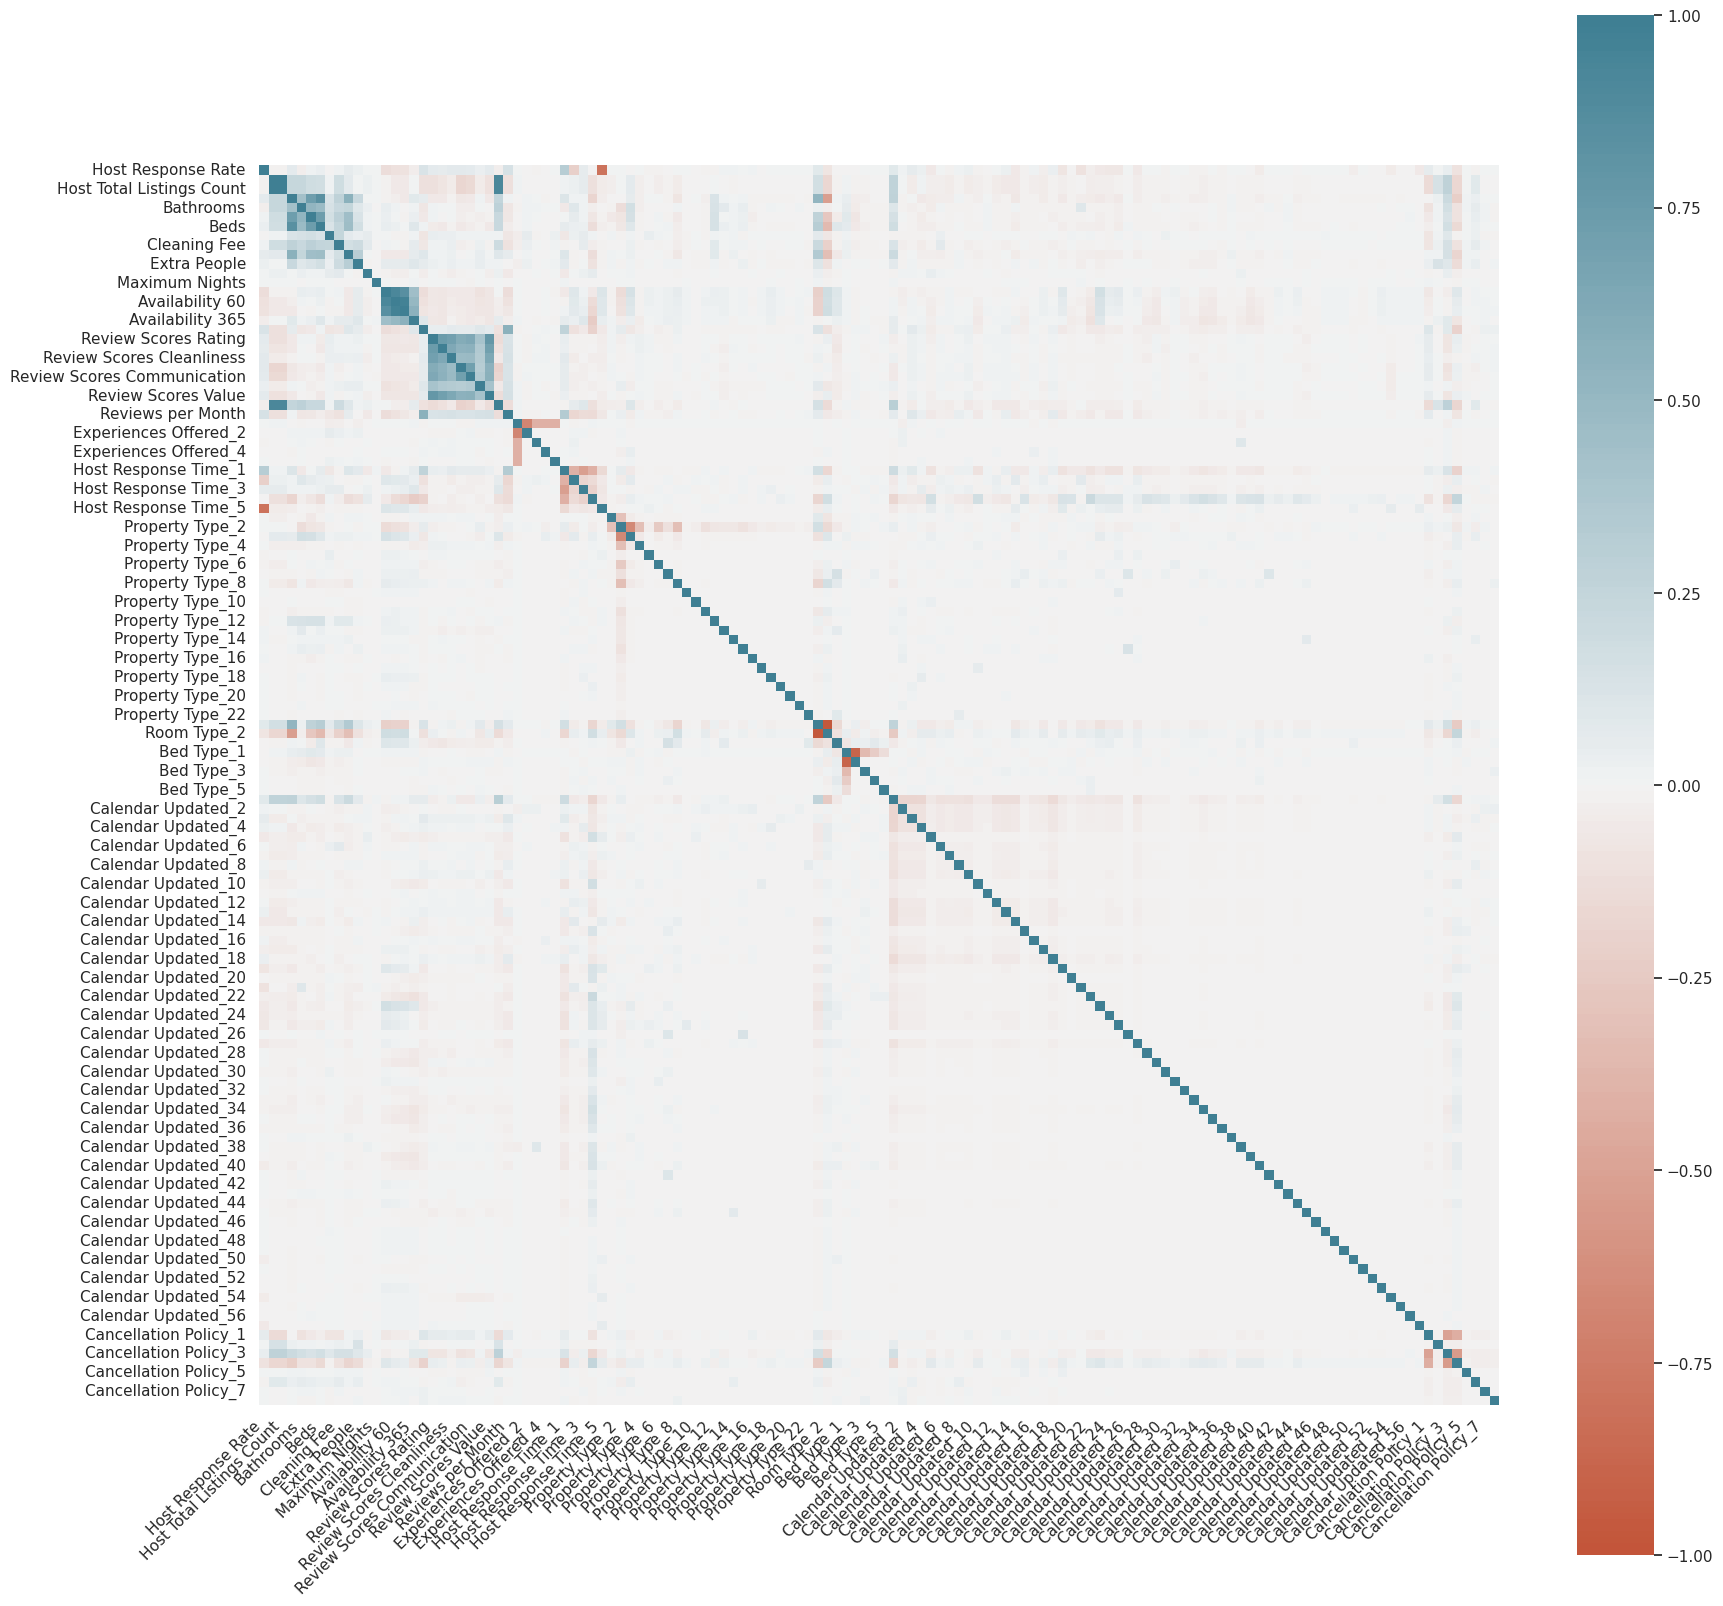

In [ ]:
corr = Correlation.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

En este diagrama de correlación, podemos observar si existen comportamientos similares y si las variables siguen las mismas tendencias. En las primeras variables, se pueden observar correlaciones significativas. Por ejemplo, hay una correlación positiva entre el número de habitaciones y el número de baños, así como una correlación positiva entre las calificaciones generales y las calificaciones de limpieza. Estas correlaciones no son sorprendentes, ya que están en línea con la lógica de la arquitectura (mayores casas tienden a tener más habitaciones y, por lo tanto, más baños) o porque una variable es parte de otra (la limpieza se evalúa dentro de la calificación general).

<ipython-input-23-e369cdf4a740>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Correlation.corr()


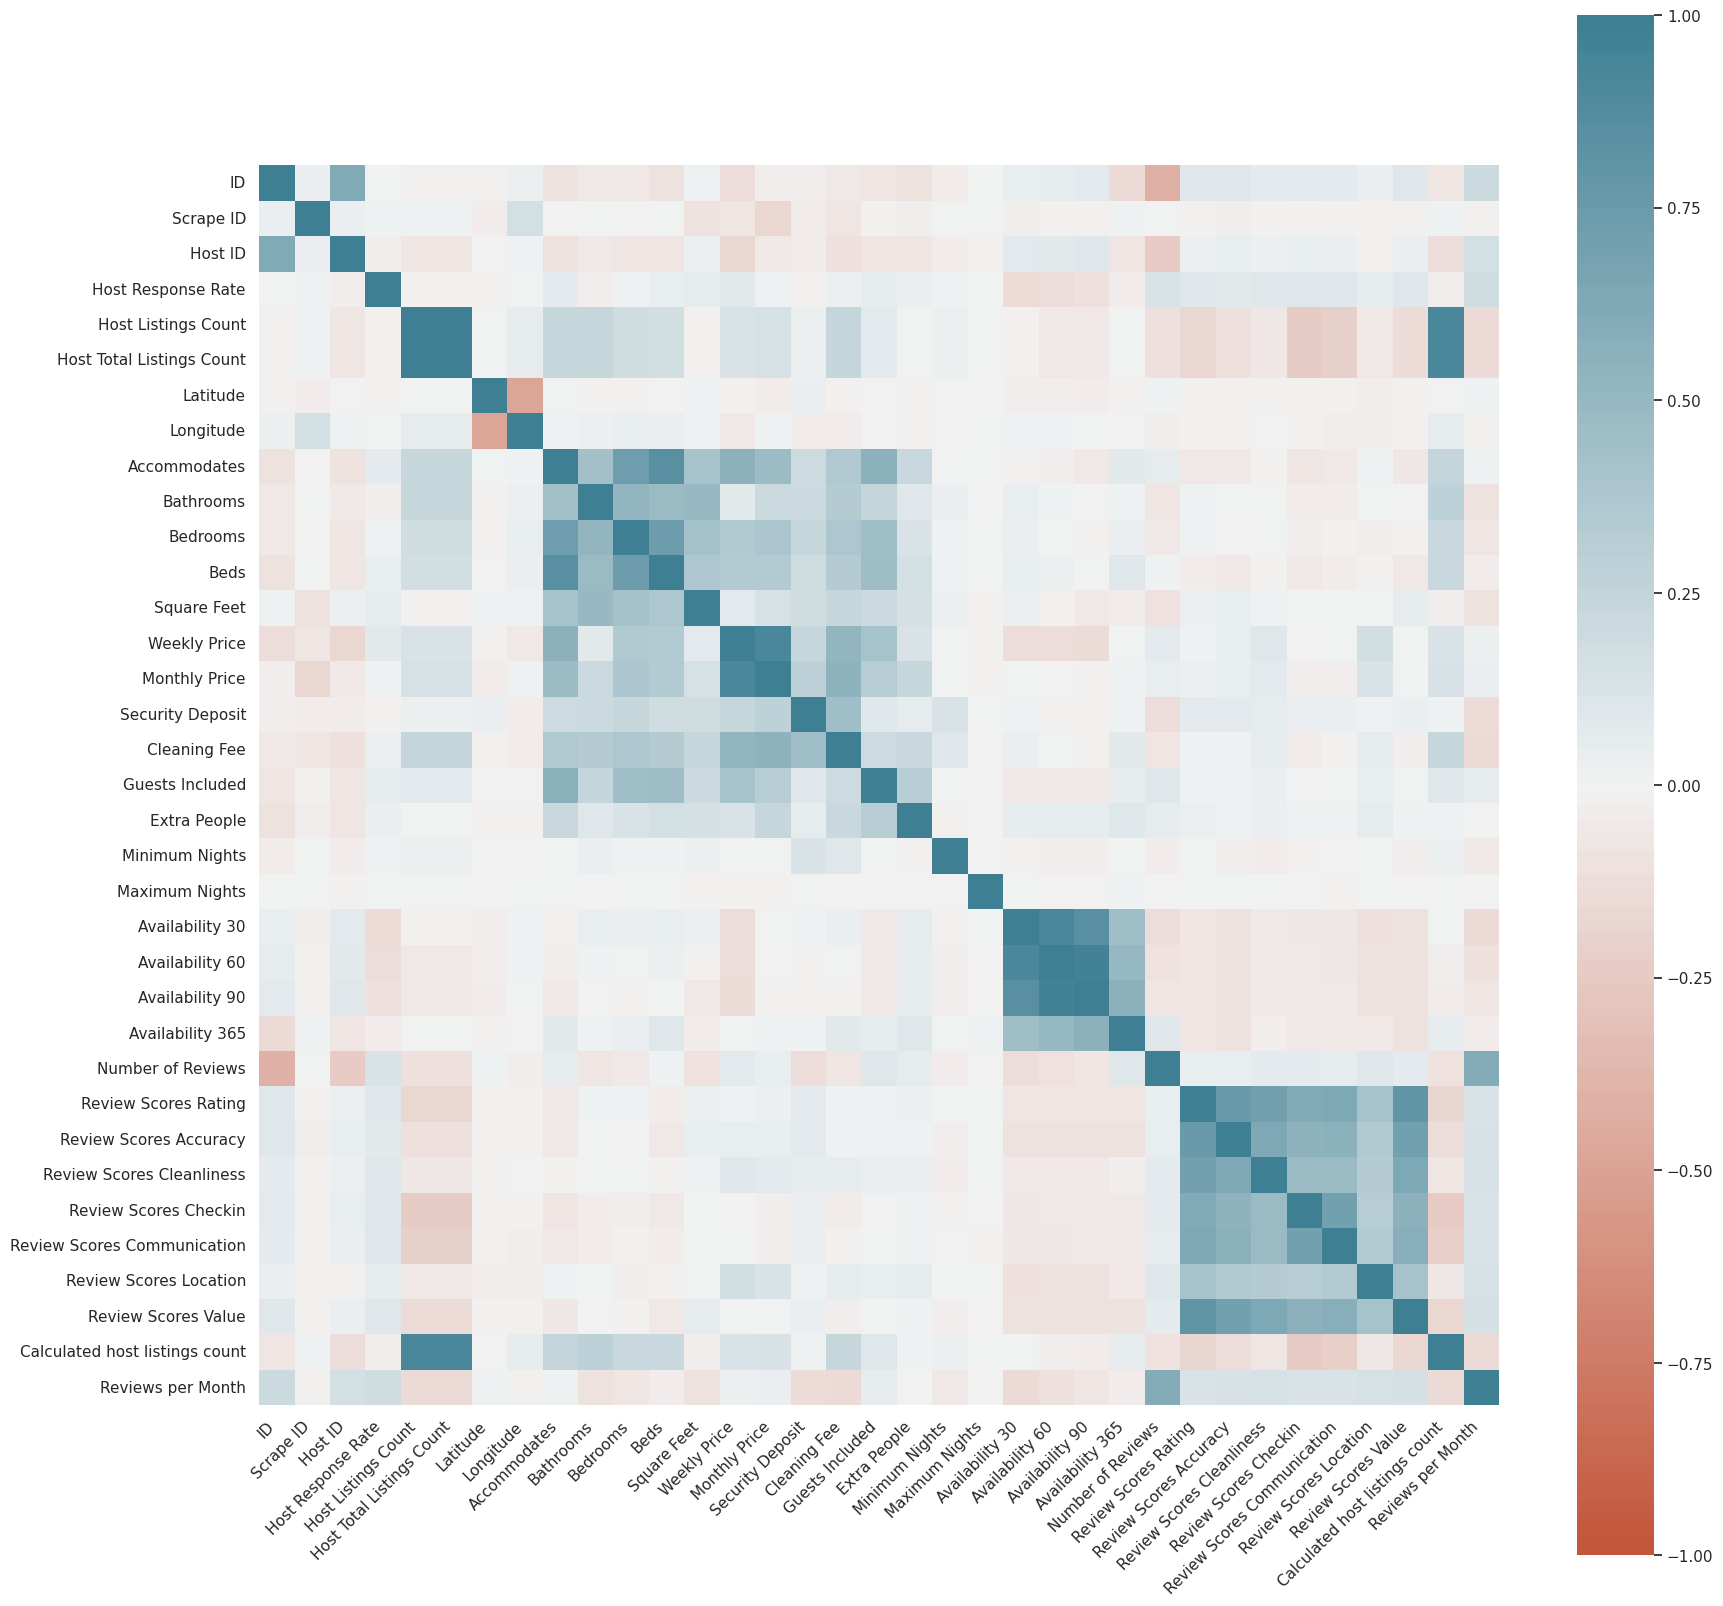

In [ ]:
Correlation = Airbnb.drop(['Price'], axis = 1)

sns.set(rc = {'figure.figsize':(20,20)})


corr = Correlation.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Para simplificar el análisis, buscaremos correlaciones fuertes en el dataframe original antes de aplicar dummies. Podemos eliminar las variables "Availability in 30" y "Availability in 60", ya que "Availability in 90 days" proporciona la misma información. También eliminaremos "Host Listings Count" y nos quedaremos con "Host Total Listing Count", ya que ambas variables aportan la misma información.
En el dataframe con las variables dummies, observamos una correlación significativa entre los tipos de camas (bed types). Sin embargo, como los cuadrados de correlación son muy pequeños, no podemos diferenciar claramente qué tipo de cama se correlaciona con qué. Por lo tanto, no eliminaremos estas variables.
Además, observamos con mayor claridad otras correlaciones que ya habíamos percibido. El primer grupo de variables correlacionadas está relacionado con el tamaño de la casa. El número de ocupantes, el número de habitaciones, el número de baños, el número de camas, los metros cuadrados, entre otros, son variables que lógicamente aumentan cuando aumentan los inquilinos.
 

In [ ]:
Airbnb_ft = Airbnb_ft.drop(['Availability 30','Availability 60','Host Listings Count'], axis = 1)
Airbnb_ft.shape

De la gráfica superior, observar si podemos/ debemos quitar las variables menos correlacionadas con Price. 

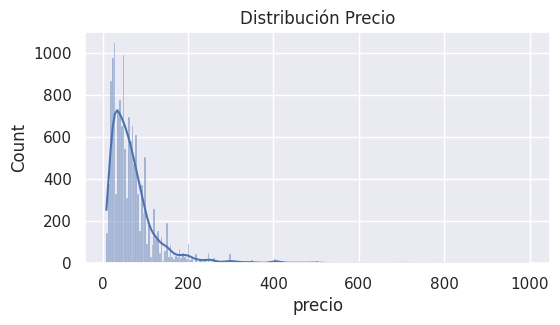

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=Airbnb_ft, x='Price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

En este grafico queda plasmada la distribucion de los airbnbs en funcion de su precio. Los precios mas comunes se obserrvan en el intervalo de 50 a 200 euros.

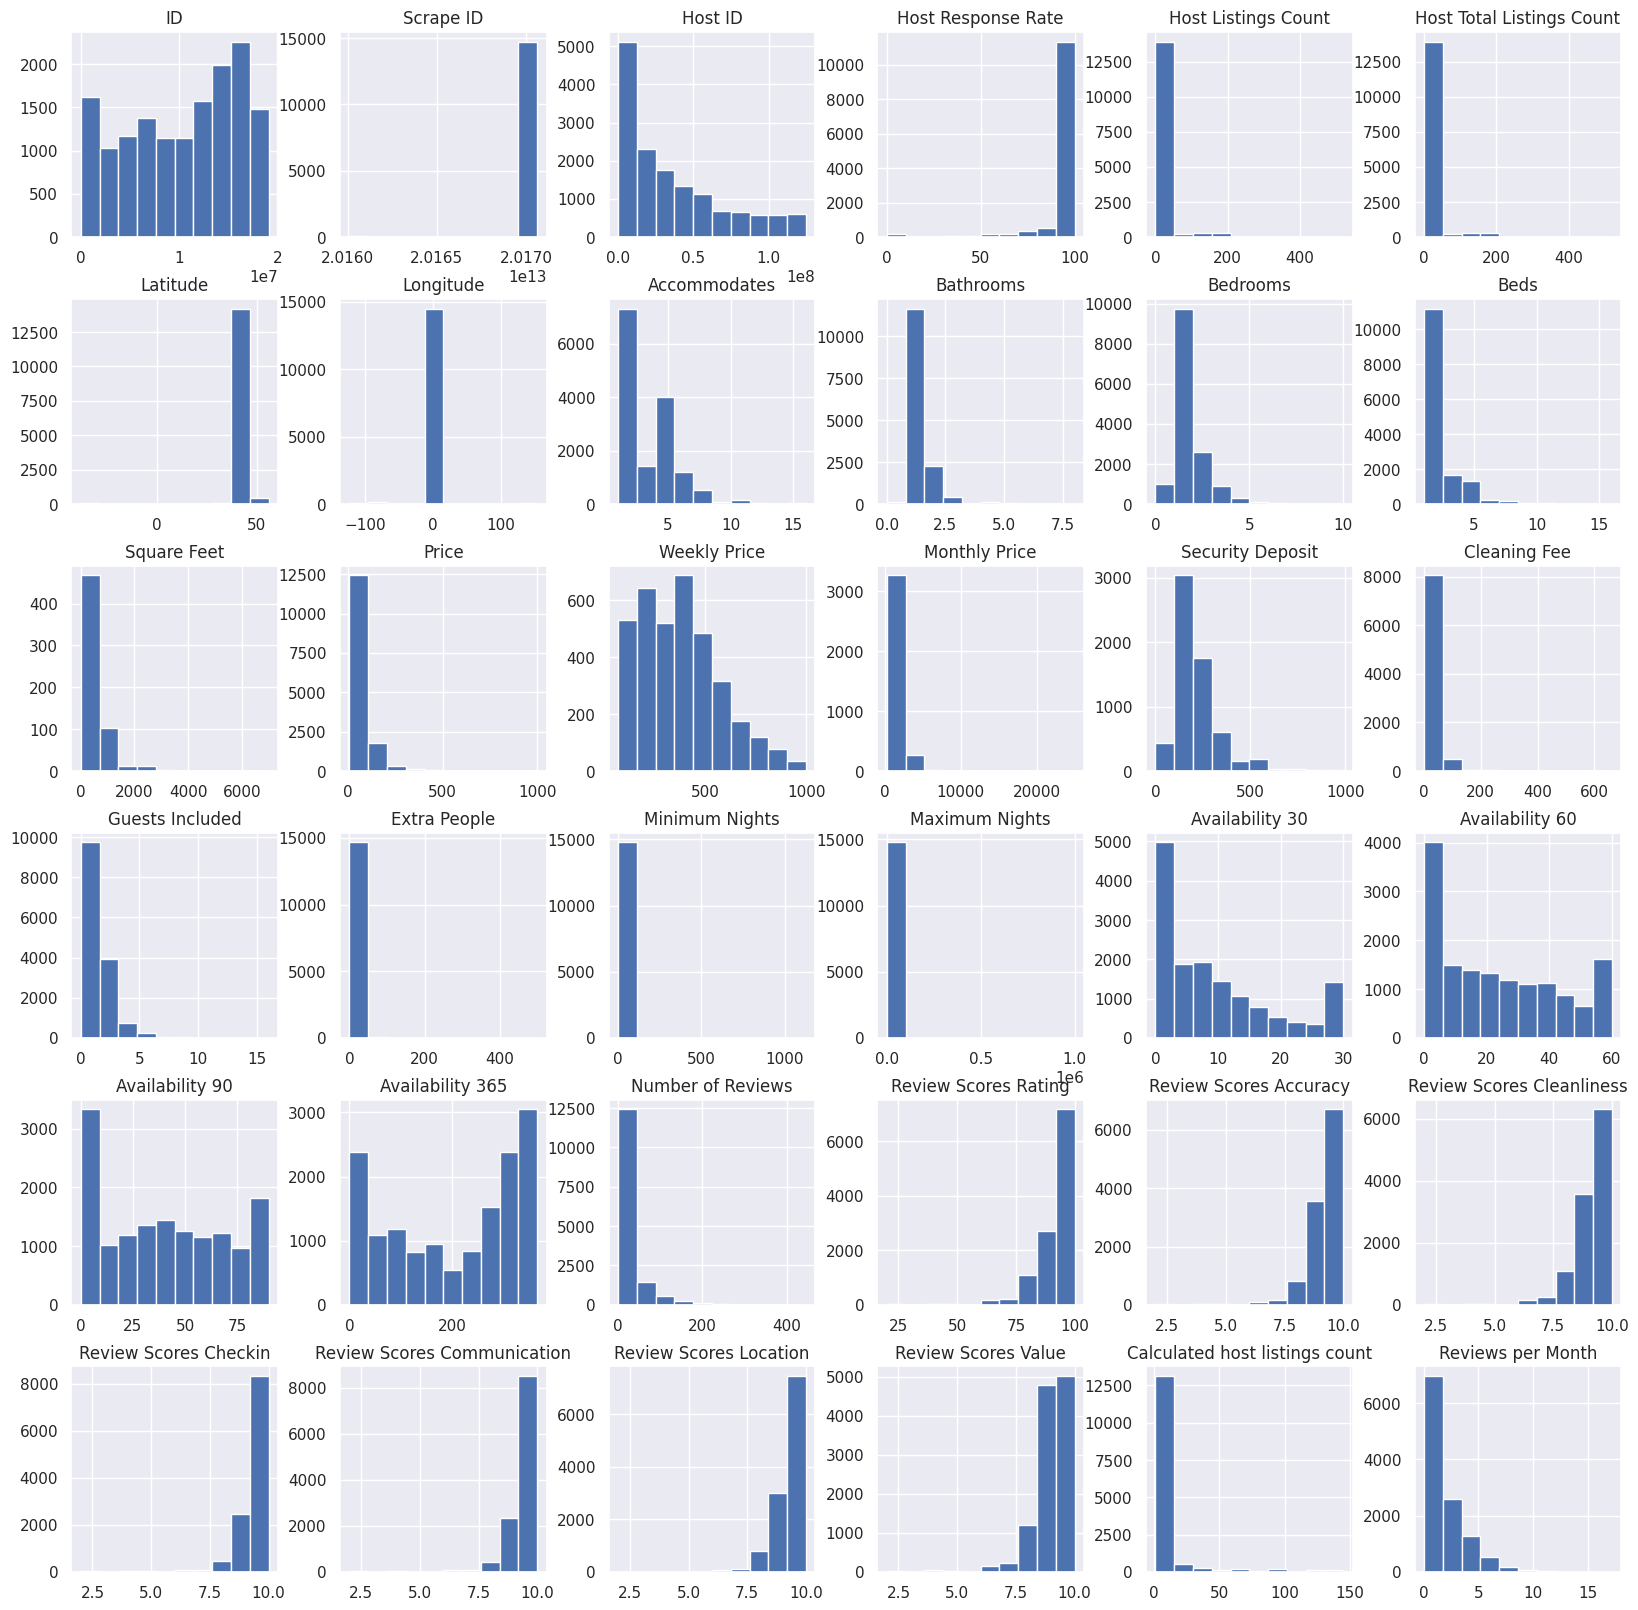

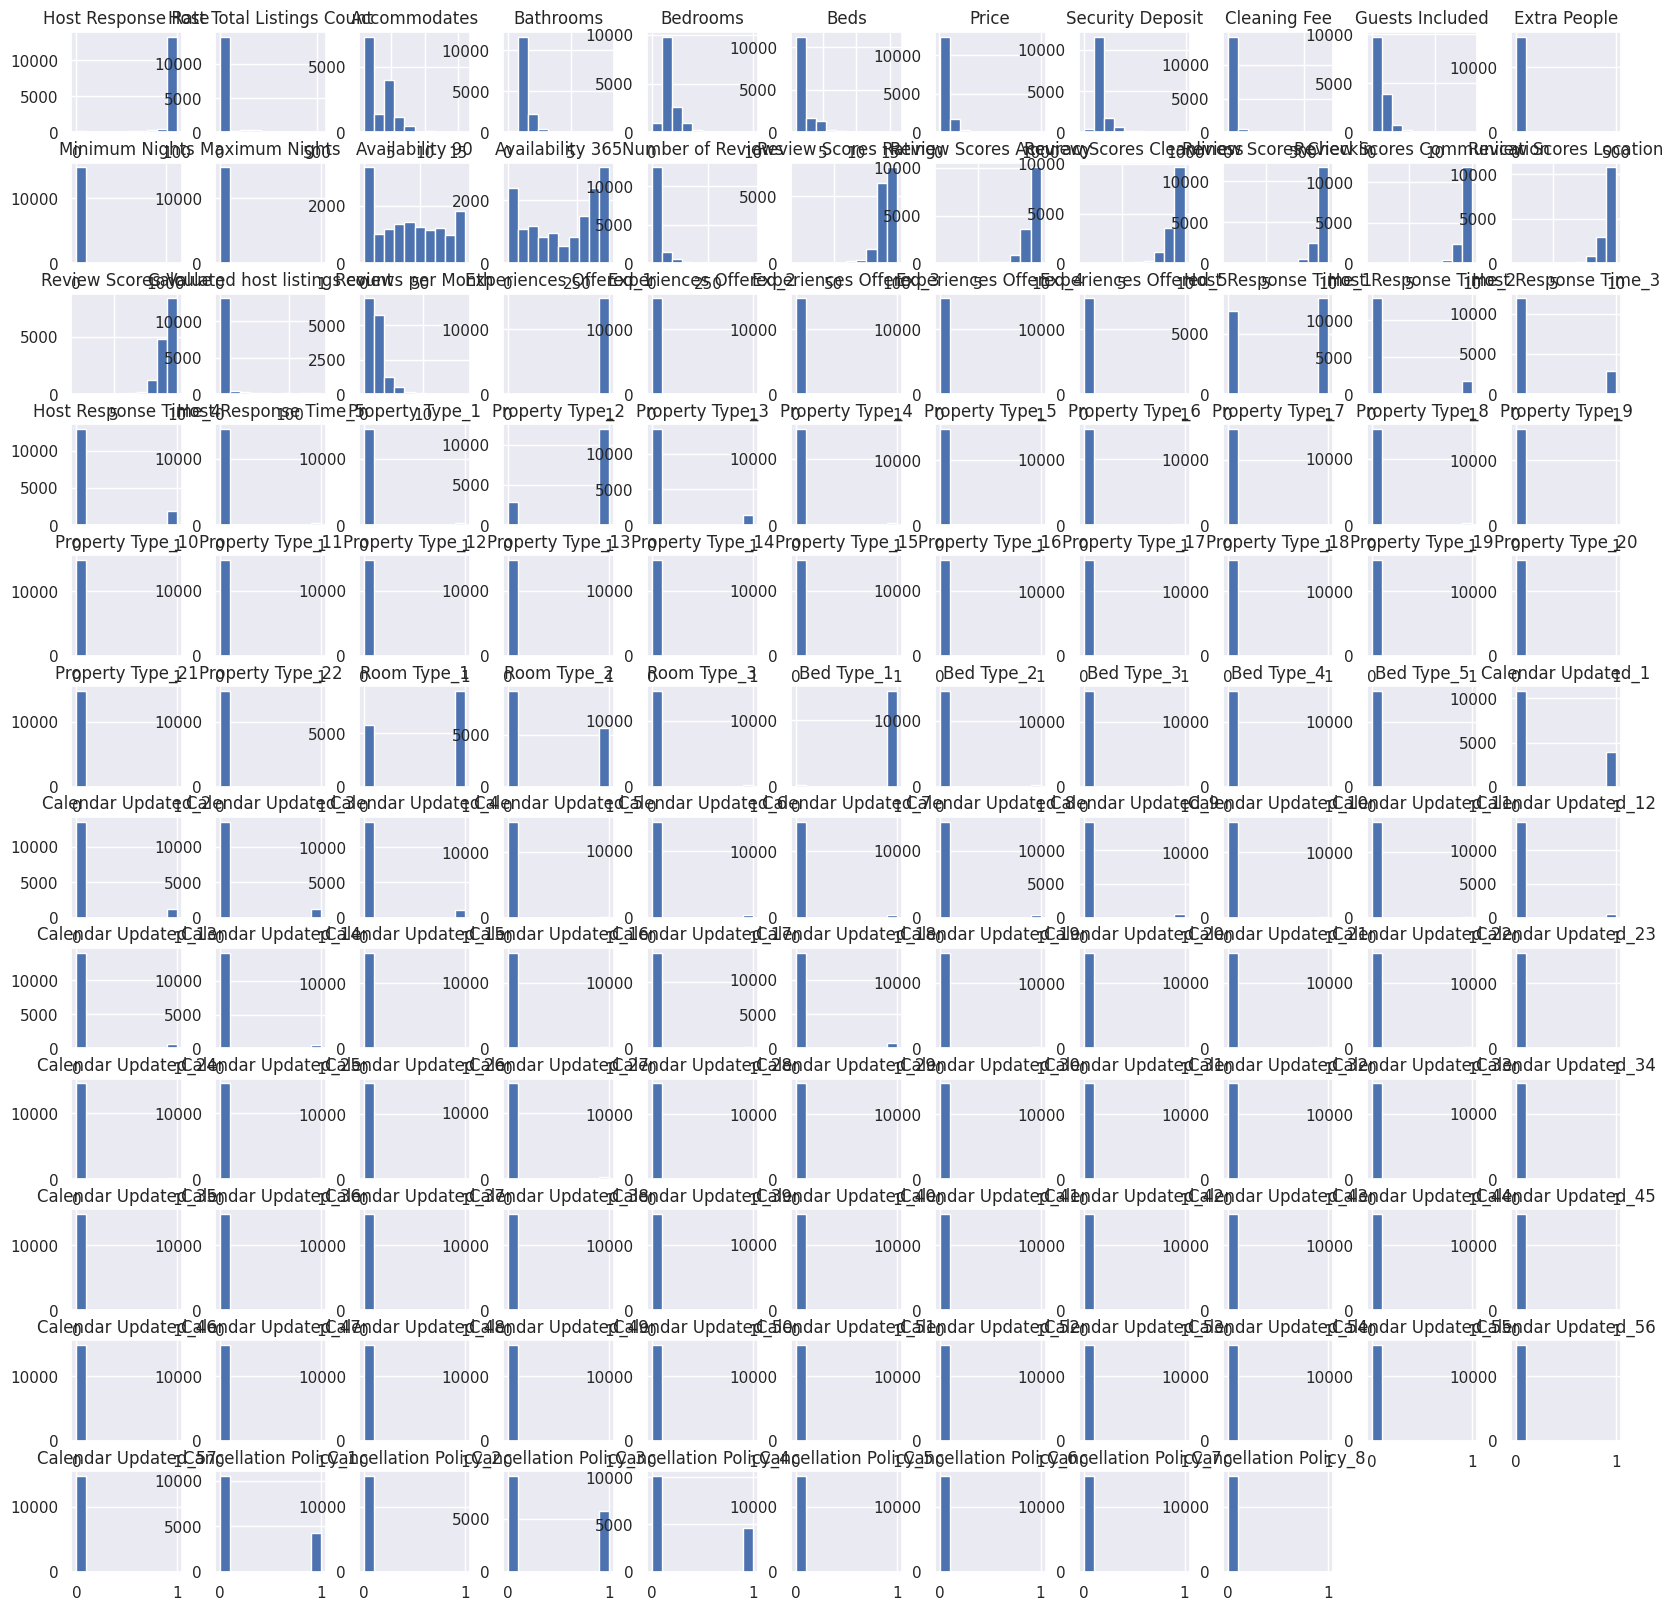

In [ ]:
Airbnb.hist()
plt.show()

Airbnb_ft.hist()
plt.show()

Airbnb_ft['Price'].describe()
Airbnb_ft = Airbnb_ft[(airbnb['Price'] <= 100)]

En estos graficos vemos la distribucion de los valores agrupados por variables. Nos hace tener una idea rapida de los intervalos en los que se mueven las variables y distinguir a priori donde se encuentran las medias y las madianas. Podemos ver entre que rangos se encuentran los precios, el numero de habitaciones, los ratings, o la disponibilidad que ofrecen. Y eliminamos posibles outliers.

#Aplicación de modelos
Separación y entrenamiento

In [ ]:
from sklearn.model_selection import train_test_split


Air_train, Air_test = train_test_split(Airbnb_ft, test_size = 0.3, stratify = Airbnb_ft["Price"])


from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_scaler = std_scaler.fit(Air_train)

In [ ]:
std_scaler

Air_train_normalized = pd.DataFrame(std_scaler.fit_transform(Air_train.values), columns=Air_train.columns)

Air_train_normalized = pd.DataFrame(Air_train_normalized, index=Air_train.index, columns=Air_train.columns)


X_norm = np.array(Air_train_normalized.drop(['Price'],axis = 1))
X = np.array(Air_train.drop(['Price'],axis = 1))
y = np.array(Air_train['Price']) 

In [ ]:
from sklearn.preprocessing import StandardScaler

Airbnb_test_normalized = pd.DataFrame(std_scaler.transform(Air_test), columns=Air_test.columns)

Airbnb_test_normalized = pd.DataFrame(Airbnb_test_normalized, index=Air_test.index, columns=Air_test.columns)

test_x_norm = np.array(Airbnb_test_normalized.drop(['Price'],axis = 1))
test_x = np.array(Air_test.drop(['Price'],axis = 1))

test_y = np.array(Air_test['Price'])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Vamos a intentar predecir los resultados utilizando diferentes modelos y comparar su rendimiento en términos del error cuadrático medio (MSE). El objetivo es identificar el modelo con el menor MSE para utilizarlo en la predicción.
Para mejorar el rendimiento de los modelos, realizaremos la optimización de los mismos. Esto implica ajustar los modelos según nuestras preferencias con el objetivo de obtener mejores resultados.
La calibración de un modelo consiste en corregir las desviaciones de su curva de calibrado en relación a la diagonal, que se considera como la calibración perfecta. Esto se puede lograr mediante un segundo modelo que aprenda cómo realizar esta corrección. Los modelos utilizados para esta corrección suelen ser la regresión logística (Platt scaling) o la regresión isotónica. Sin embargo, se recomienda usar la regresión isotónica solo cuando se cuenta con más de 1000 observaciones debido a su mayor susceptibilidad al sobreajuste.
Es importante destacar que el modelo correctivo no debe entrenarse con los mismos datos utilizados para entrenar el modelo principal, esto se hace para evitar el sobreajuste. En su lugar, se debe utilizar un conjunto de validación o realizar validación cruzada para entrenar el modelo correctivo.


#Regresión Lineal
Entrenamiento

In [ ]:

lr = linear_model.LinearRegression()
lr.fit(X,y)
lr.score(X,y)

predictions = lr.predict(test_x)
R_2 = lr.score(test_x,test_y)
R_2

0.5819006892442522

#Evaluación

In [ ]:
predictions = lr.predict(test_x)
R_2 = lr.score(test_x,test_y)
R_2

predicted_data_norm = Airbnb_test_normalized.copy()
predicted_data_norm['Price'] = predictions

predicted_data_unorm = pd.DataFrame(index=predicted_data_norm.index, 
                                    columns=predicted_data_norm.columns, 
                                    data=train_scaler.inverse_transform(predicted_data_norm))


In [ ]:
predicted_data_unorm['predicted_price'] = predicted_data_unorm['Price']

predicted_data_unorm['Price'] = Air_test['Price']

predicted_data_unorm['Price']

predicted_data_unorm[['Price','predicted_price']].head(3)

rmse_linear = np.sqrt(((predicted_data_unorm['Price'] - predicted_data_unorm['predicted_price'])**2).mean())

rmse_linear

1308.0967730686586

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted_data_unorm['Price'], predicted_data_unorm['predicted_price'], squared=False)

lr_error = round(np.mean(100*np.sqrt((predicted_data_unorm['Price'] - predicted_data_unorm['predicted_price'])**2)/predicted_data_unorm['Price']),2)
lr_error

lr.get_params().keys()


dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

La calibración de un modelo implica corregir las desviaciones de su curva de calibrado en relación a la diagonal, que representa la calibración perfecta. Esta corrección se puede lograr mediante la utilización de un segundo modelo que aprenda cómo realizar dicha corrección. Los modelos comúnmente empleados para esta calibración son la regresión logística (platt scaling) y la regresión isotónica. Sin embargo, se recomienda utilizar la regresión isotónica únicamente cuando se cuenta con más de 1000 observaciones, debido a su mayor susceptibilidad al sobreajuste.
Es importante tener en cuenta que el entrenamiento del modelo correctivo no debe llevarse a cabo utilizando los mismos datos utilizados para entrenar el modelo principal. Esto se hace para evitar el sobreajuste. En su lugar, se debe utilizar un conjunto de validación o aplicar validación cruzada para entrenar el modelo correctivo de manera adecuada.


#Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor()
boost.fit(X, y)
boost.score(X, y)

boost.score(test_x, test_y)

rmse_gboost = mean_squared_error(test_y, 
                                 boost.predict(test_x), squared=False)

rmse_gboost

14.07514844278893

In [ ]:
gboost_error = round(np.mean(100*np.sqrt((test_y - boost.predict(test_x))**2)/test_y),2)
gboost_error

boost.feature_importances_

features = [(a,b) for a,b in zip(Air_train.columns, boost.feature_importances_)]
features = sorted(features, key= lambda c:c[1], reverse=True)
features


[('Property Type_22', 0.6940162026676137),
 ('Accommodates', 0.07617446296285242),
 ('Security Deposit', 0.03996213025928372),
 ('Guests Included', 0.028279261442856262),
 ('Review Scores Communication', 0.027902582250883476),
 ('Bedrooms', 0.012902596630032214),
 ('Bathrooms', 0.012506418413055016),
 ('Host Total Listings Count', 0.012260140656185579),
 ('Cleaning Fee', 0.011779234861895678),
 ('Calculated host listings count', 0.010799176564899995),
 ('Number of Reviews', 0.009618038755626494),
 ('Price', 0.009259805282788408),
 ('Maximum Nights', 0.007086378899987377),
 ('Extra People', 0.006621780272978044),
 ('Review Scores Value', 0.006555144303971542),
 ('Availability 90', 0.0046901970219673335),
 ('Review Scores Accuracy', 0.0040246896894855395),
 ('Host Response Time_3', 0.0036560948422541496),
 ('Beds', 0.002946737339207705),
 ('Room Type_2', 0.0026822668206111593),
 ('Availability 365', 0.0018467985255550836),
 ('Minimum Nights', 0.001817951365593509),
 ('Property Type_9', 0

#Hiperparámetros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing


parameters = ({'learning_rate':[0.01, 0.1],
               'n_estimators': [200, 100],
               'subsample': [1, 0.7],
               'min_samples_split': [2, 4]})


In [ ]:
grid = RandomizedSearchCV(
        estimator  = boost,
        param_distributions = parameters,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [200, 100],
                                        'subsample': [1, 0.7]},
                   random_state=123, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [ ]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)
    
boost.get_params().keys()


dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind



<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#K-NN


El algoritmo K-Nearest Neighbors (KNN) tiene como objetivo calcular la distancia entre un nuevo punto de datos y cada ejemplo de entrenamiento. Para lograr esto, se utilizan diferentes medidas de distancia, siendo la distancia euclidiana la más común. Otras distancias utilizadas pueden incluir la distancia de Hamming o la distancia de Manhattan. El modelo selecciona los K puntos de entrenamiento que están más cercanos al nuevo punto de datos. Luego, se realiza una votación por mayoría, lo que significa que la clase o etiqueta más común entre esos K puntos será asignada como la clase del nuevo punto de datos.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#Entrenamiento

In [ ]:
knn = KNeighborsRegressor()

knn.fit(X,y)

knn.score(X,y)


0.4582977795642006

#Evaluación

In [ ]:
knn.score(test_x,test_y)
knn.predict(test_x)[0]

knn_data_norm = Airbnb_test_normalized.copy()
knn_data_norm['Price'] = knn.predict(test_x)

knn_data_unorm = pd.DataFrame(index=knn_data_norm.index, 
                              columns=knn_data_norm.columns, 
                              data=std_scaler.inverse_transform(knn_data_norm))



In [ ]:

knn_data_unorm['predicted_price'] = knn_data_unorm['Price']
knn_data_unorm['Price'] = Air_test['Price']


knn_data_unorm['Price']=knn_data_unorm['Price'].replace(Air_test['Price'])


knn_data_unorm[['Price','predicted_price']].head(4)


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

,Price,predicted_price
ID,,
1598288,66.0,1665.775510
5291844,20.0,1318.694488
10536944,60.0,1342.797337
9849901,30.0,788.431817


In [ ]:
rmse_knn = np.sqrt(((knn_data_unorm['Price'] - knn_data_unorm['predicted_price'])**2).mean())

rmse_knn

knn_error = round(np.mean(100*np.sqrt((knn_data_unorm['Price'] - knn_data_unorm['predicted_price'])**2)/knn_data_unorm['Price']),2)
knn_error

2934.06

In [ ]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_depth=6)
regressor.fit(X, y)

y_pred = regressor.predict(test_x)

regressor.score(X,y)

y_pred = regressor.predict(test_x)

In [ ]:
regressor.score(test_x,test_y)
data_eval = Air_test.copy()
data_eval['Price_predicted'] =  regressor.predict(test_x)
rmse_tree = np.sqrt(((data_eval['Price'] - data_eval['Price_predicted'])**2).mean())
rmse_tree


tree_error = round(np.mean(100*np.sqrt((data_eval['Price'] - data_eval['Price_predicted'])**2)/data_eval['Price']),2)
tree_error

regressor.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

#Arbol de Decisión

In [ ]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor( max_depth=6)
regressor.fit(X, y)

y_pred = regressor.predict(test_x)

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
regressor.score(X,y)
y_pred = regressor.predict(test_x)

#Evaluación

In [ ]:
regressor.score(test_x,test_y)

In [ ]:
data_eval = Air_test.copy()
data_eval['Price_predicted'] =  regressor.predict(test_x)
rmse_tree = np.sqrt(((data_eval['Price'] - data_eval['Price_predicted'])**2).mean())
rmse_tree

In [ ]:
tree_error = round(np.mean(100*np.sqrt((data_eval['Price'] - data_eval['Price_predicted'])**2)/data_eval['Price']),2)
tree_error

In [ ]:
regressor.get_params().keys()

Profundidad del árbol: 6
Número de nodos terminales: 63


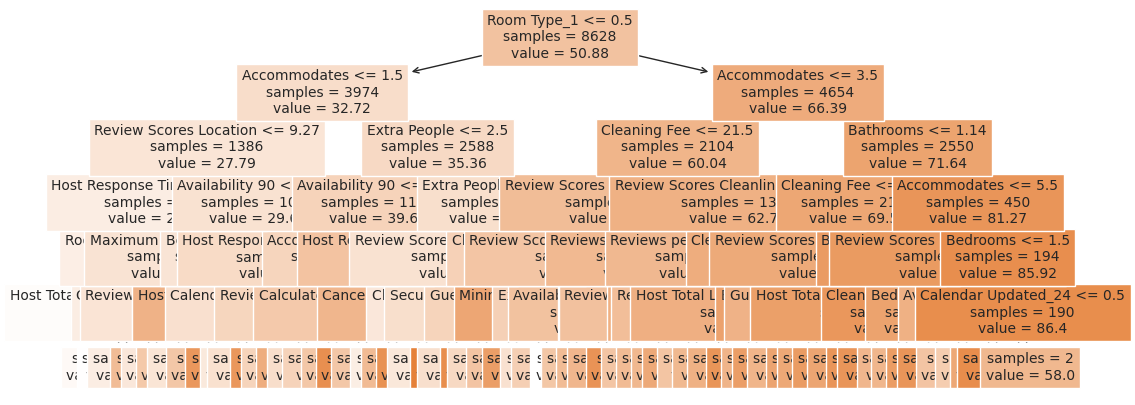

In [ ]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {regressor.get_depth()}")
print(f"Número de nodos terminales: {regressor.get_n_leaves()}")

plot = plot_tree(
            decision_tree = regressor,
            feature_names = data_eval.drop(columns = "Price").columns,
            class_names   = 'Price',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}


In [ ]:
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )
grid.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

In [ ]:
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

In [ ]:
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 3
Número de nodos terminales: 6


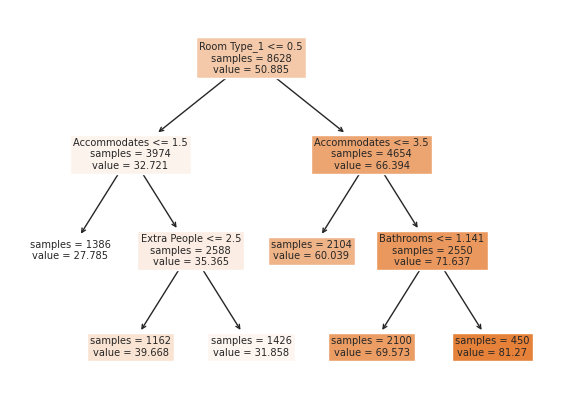

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = data_eval.drop(columns = "Price").columns,
            class_names   = 'Price',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [ ]:
modelo_final.predict(test_x)

array([60.03944867, 27.78539789, 69.5732416 , ..., 60.03944867,
       39.66781411, 39.66781411])

In [ ]:
data_eval = Air_test.copy()
data_eval['Price_predicted'] =  modelo_final.predict(test_x)
rmse_tree = np.sqrt(((data_eval['Price'] - data_eval['Price_predicted'])**2).mean())
rmse_tree

tree_error = round(np.mean(100*np.sqrt((data_eval['Price'] - data_eval['Price_predicted'])**2)/data_eval['Price']),2)
tree_error


30.99

# Conclusión


Para concluir, de los tres modelos que hemos estudiado, elegiríamos Gradient Boost como el modelo preferido. Este modelo muestra un MSE (Mean Square Error) considerablemente más bajo que los otros modelos, a excepción del modelo de Árboles de Decisión. Además, el modelo de Árboles de Decisión se acerca mucho al rendimiento del modelo de Gradient Boost y ofrece una perspectiva más intuitiva del criterio de los propietarios al fijar los precios de sus propiedades, gracias al esquema visual que proporciona.